# Cycle 6 CS1PX Lab - Searching


This week you will work with the algorithms the searching algorithms we discussed in lecture.  I want you to write some new code, as well as to try to produce code that we worked on in class.  I will also ask you to try to identify bugs in a binary search implementation.  It may help to trace the operation of the code by hand, to see where it goes wrong.  




### Task 1 - Counting comparisons in linear search
1. Implement a simple linear search that takes a list and a value, and returns the index of the value if it is present in the list.  
2. Now, add a counter to your function that counts how many items in the list are compared to your target item.
3. Generate a 100-item list containing the numbers 0 to 99.  Then generate 100 shuffles of this list (you may with to use the random.shuffle function within the random library - look up what it does and try it out.), and use your code from (b) to count how many comparisons are used to find the item 42 in each of your shuffled lists.  What is the mean of these numbers? Is it as you expect?




In [27]:
def simple_search(my_list, value):
    count = 0
    for i in range(len(my_list)):
        count += 1
        if my_list[i] == value:
            return count

my_list = []
for i in range(0,99,1):
    my_list.append(i)
    
import random

comparisons = []
for i in range(100):
    random.shuffle(my_list)
    comparisons.append(simple_search(my_list,42))
    
sumlist = 0
mean = 0
for i in comparisons:
    sumlist += i
    
mean = sumlist / len(comparisons)
print(mean)
    

48.38


### Task 2 - Finding bugs in binary search
In the code below there are three copies of iterative binary search, each of which has a bug.  

Trace each of these pieces of code, identify the bug, and decide how to fix it.  You will learn more from this exercise if you don’t look at a correct copy of binary search while doing it, and don’t compare across buggy versions until you are done.  I suggest you work on them one at a time.  You should be able to give an input to each piece of buggy code that shows the problem when you trace the operation on that input.




In [ ]:
def iterative_binary_search_buggy1(my_list, value): 
    lo, hi = 0, len(my_list)-1 
    while lo < hi: #equal to. otherwise can miss final value.
        mid = (lo + hi) // 2 
        if my_list[mid] < value: 
            lo = mid + 1 
        elif value < my_list[mid]: 
            hi = mid - 1 
        else: 
            return mid 
    return -1 


def iterative_binary_search_buggy2(my_list, value): 
    lo, hi = 0, len(my_list)-1 
    while lo <= hi: 
        mid = (lo + hi) // 2 
        if my_list[mid] < value: 
            lo = mid + 1 
        elif value <= my_list[mid]: #only less than, otherwise will skip value
            hi = mid - 1 
        else: 
            return mid 
    return -1 


def iterative_binary_search_buggy3(my_list, value): 
    lo, hi = 0, len(my_list)-1 
    while lo <= hi: 
        mid = (lo + hi) // 2 
        if my_list[mid] <= value: #only less than, otherwise will skip value
            lo = mid + 1 
        elif value < my_list[mid]: 
            hi = mid - 1 
        else: 
            return mid 
    return -1 

### Task 3 - Implementing a recursive binary search
Using your debugged version of an iterative binary search, try to produce a recursive version of binary search. You will learn more from this exercise if you don’t look at a copy of recursive binary search while doing it.  If you feel stuck, remember how we approached recursive functions in cycle 2 - what are the base cases?  What are the recursive cases? 




In [3]:
def recursive_binary_search(my_list, lo, hi, value):
    if len(my_list) < 1:
        return -1
    if lo > hi:
        return -1
    
    mid = (lo + hi) // 2
    mid_value = my_list[mid]
    
    if mid_value == value:
        return mid
    elif mid_value < value:
        return recursive_binary_search(my_list, (mid + 1), hi, value)
    else:
        return recursive_binary_search(my_list, lo, (mid - 1), value)

import random
my_list = []
for i in range(0,100,1):
    my_list.append(random.randint(0,100))
    
my_list.sort()
print(my_list)

my_list = [130, 521, 530, 554, 810, 869, 894, 1008, 1156, 1343, 1471, 1550, 1755, 1971, 2212, 2366, 2515, 2559, 2571, 2682, 2700, 2719, 2940, 3068, 3095, 3163, 3252, 3262, 3281, 3351, 3388, 3441, 3548, 3650, 3714, 3763, 3867, 4035, 4230, 4241, 4406, 4437, 4646, 4892, 4919, 4944, 5000, 5277, 5376, 5439, 5462, 5595, 5634, 5699, 5713, 5734, 5784, 5892, 5943, 6005, 6127, 6133, 6171, 6317, 6320, 6379, 6389, 6633, 6818, 6931, 6934]

recursive_binary_search(my_list, 0, len(my_list)-1, 521)

[0, 0, 3, 4, 5, 5, 6, 7, 8, 9, 9, 10, 10, 11, 12, 12, 12, 13, 13, 13, 16, 17, 21, 21, 21, 21, 21, 22, 23, 24, 25, 25, 26, 28, 29, 29, 30, 33, 33, 33, 35, 35, 36, 36, 37, 38, 38, 39, 40, 40, 40, 41, 42, 44, 44, 44, 48, 48, 49, 49, 49, 50, 52, 57, 58, 63, 63, 66, 66, 67, 67, 67, 68, 68, 69, 70, 70, 72, 74, 75, 75, 78, 78, 80, 80, 82, 84, 85, 89, 90, 90, 90, 92, 94, 95, 95, 97, 97, 98, 100]


1

### Task 4 
1. Using your plotting code from last week, plot the running time of your two binary search implementations on a number of sorted lists of random numbers, both when the target is present in the list and when it is not.
2. Say we are given a list that is composed of an increasing sequence of numbers followed by a decreasing sequence.  (e.g. [1, 2, 3, 6, 29, 13, 12, 11, 6]) Can you write an adaptation of binary search that finds the index of the last number in the increasing sequence (here it would be the index of 29)?

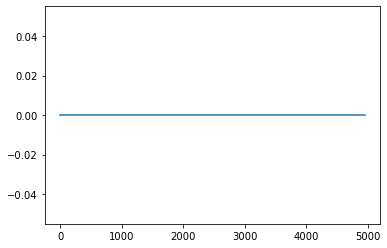

In [5]:
import time
import random 
import matplotlib.pyplot as plt

def testRuntimes(functionName, maxSize):
    maxN = int(maxSize)
    increment = int(maxSize/100)
    if increment <1:
        increment = 1
    
    inputs = []
    for i in range(1, maxN +1, increment):
        res = random.sample(range(0, maxN), i)
        res.sort()
        inputs.append(res)
    plotRuntimes(functionName, inputs)
    

def plotRuntimes(func, listOfInputs):
    times = []
    sizes = []
    for inputItem in listOfInputs:
        sizes.append(len(inputItem))
        t = time.process_time()
        func(inputItem, 0, len(inputItem)-1, 20)
        elapsed_time = time.process_time() - t
        times.append(elapsed_time)
    plt.plot(sizes, times)
    plt.show()
    
def iterative_binary_search(my_list, value): 
    lo, hi = 0, len(my_list)-1 
    while lo <= hi:
        mid = (lo + hi) // 2 
        if my_list[mid] < value: 
            lo = mid + 1 
        elif value < my_list[mid]: 
            hi = mid - 1 
        else: 
            return mid 
    return -1 
    
testRuntimes(recursive_binary_search, 5000)

Say we are given a list that is composed of an increasing sequence of numbers followed by a decreasing sequence. (e.g. [1, 2, 3, 6, 29, 13, 12, 11, 6]) Can you write an adaptation of binary search that finds the index of the last number in the increasing sequence (here it would be the index of 29)?

In [5]:
def recursive_binary_search(my_list, lo, hi):
    if len(my_list) < 1:
        return -1
    if lo > hi:
        return -1
    
    mid = (lo + hi) // 2
    mid_value = my_list[mid]
    
    if mid_value == value:
        return mid
    elif mid_value < value:
        return recursive_binary_search(my_list, (mid + 1), hi, value)
    else:
        return recursive_binary_search(my_list, lo, (mid - 1), value)
    
def increasing_search(my_list, lo, hi):
    if len(my_list) < 1:
        return -1
    if lo > hi:
        return -1
    
    mid = (lo + hi) // 2
    mid_value = my_list[mid]
    
    if mid_value > my_list[mid-1] and mid_value > my_list[mid+1]:
        return mid
    elif mid_value < my_list[mid+1]:
        return increasing_search(my_list, mid, hi)
    elif my_list[mid+1] < mid_value:
        return increasing_search(my_list, lo, mid)
    
my_list = [1, 2, 3, 6, 7, 8, 9, 19, 29, 13, 12, 11, 6]
increasing_search(my_list, 0, len(my_list)-1)

8